## Assignment

In this assignment, you'll continue working with the Students Performance in Exams dataset from Kaggle. You should access the data from the Thinkful database. Here's the credentials you can use to connect to the database:

postgres_user = 'dsbc_student'<br>
postgres_pw = '7\*.8G9QH21'<br>
postgres_host = '142.93.121.174'<br>
postgres_port = '5432'<br>
postgres_db = 'studentsperformance'<br>

To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks:

1. Are the exam score variables normally distributed? If not, apply a Box-Cox transformation. Does anything change?
2. Say we want to use a single variable for the exam scores as our target. For this purpose, create a new variable by taking a weighted average of the exam scores. Check whether this new variable is normally distributed. If it's not normally distributed, apply a Box-Cox transformation and check whether or not the transformed variable is normally distributed.
3. Which variables seem related to the target variable (the newly created variable in the previous question)? If our goal is to explain the determinants of success in exams, which variables in our dataset might be useful?


In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sqlalchemy import create_engine
import warnings 

warnings.filterwarnings('ignore')
sns.set(style="darkgrid")

In [101]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

stu = pd.read_sql_query('select * from studentsperformance',con=engine)

engine.dispose()

stu.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [8]:
stu.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### 1. Are the exam score variables normally distributed? If not, apply a Box-Cox transformation. Does anything change?

As can be seen from the histograms, all distributions are close to normal but a little negatively skewed meaning that the mean is slightly smaller than the median. To confirm, I run Jarque-Bera and Normal tests to test for normality. 

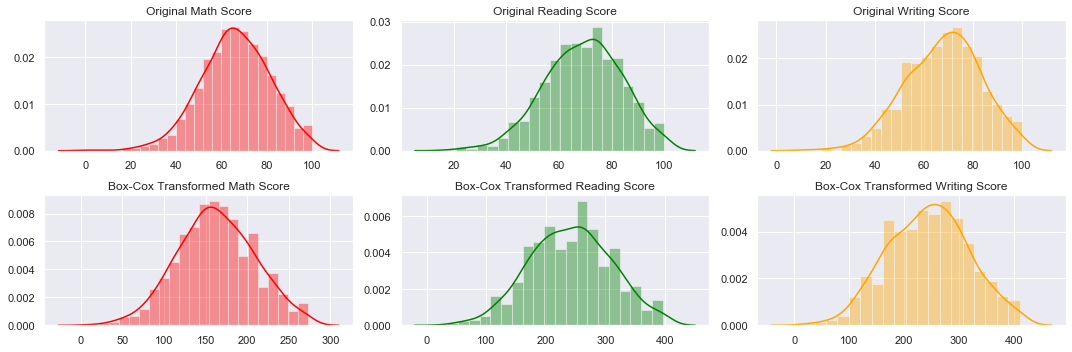

----------------------------------------------------
Normality Test for Original Math Score
Jarque-Bera test statistics is 15.912256686712709 and p-value is 0.0003505075386818213
Normality test statistics is 15.408960513931822 and p-vallue is 0.00045080293869937836
----------------------------------------------------
Normality Test for Box-Cox Transformed Math Score
Jarque-Bera test statistics is 1.7200982636836308 and p-value is 0.42314129209599327
Normality test statistics is 1.8323075851586939 and p-vallue is 0.4000547794685686
----------------------------------------------------
Normality Test for Original Reading Score
Jarque-Bera test statistics is 11.383300575987892 and p-value is 0.0033740202672214448
Normality test statistics is 11.11741279628622 and p-vallue is 0.003853758403576582
----------------------------------------------------
Normality Test for Box-Cox Transformed Reading Score
Jarque-Bera test statistics is 4.119778573559666 and p-value is 0.127468081515408
Normality

In [71]:
var = ['math score', 'reading score', 'writing score']
color = ['red', 'green', 'orange']

plt.figure(figsize=(15,5))

for i in range(0, len(var)):
    plt.subplot(2,3,i+1)
    sns.distplot(stu[var[i]], color=color[i])
    plt.title("Original {}".format(var[i].title()))
    plt.xlabel("")
    
    boxcox_score,_ = boxcox(stu[var[i]][stu[var[i]]>0])
    
    plt.subplot(2,3,i+4)
    sns.distplot(boxcox_score, color=color[i])
    plt.title("Box-Cox Transformed {}".format(var[i].title()))

plt.tight_layout()
plt.show()

for i in range(0, len(var)):
    
    jb_stats1 = jarque_bera(stu[var[i]])
    norm_stats1 = normaltest(stu[var[i]])
    print("----------------------------------------------------")
    print("Normality Test for Original {}".format(var[i].title()))
    print("Jarque-Bera test statistics is {0} and p-value is {1}".format(jb_stats1[0],jb_stats1[1]))
    print("Normality test statistics is {0} and p-vallue is {1}".format(norm_stats1[0], norm_stats1[1]))
    
    boxcox_score,_ = boxcox(stu[var[i]][stu[var[i]]>0])
    jb_stats2 = jarque_bera(boxcox_score)
    norm_stats2 = normaltest(boxcox_score)
    print("----------------------------------------------------")
    print("Normality Test for Box-Cox Transformed {}".format(var[i].title()))
    print("Jarque-Bera test statistics is {0} and p-value is {1}".format(jb_stats2[0],jb_stats2[1]))
    print("Normality test statistics is {0} and p-vallue is {1}".format(norm_stats2[0], norm_stats2[1]))

Results from normality tests confirm that these three variables don't follow a normal distribution. Then, a box-cox transformation is applied. Distributions are more like normal distributions. Run normality test to confirm. After box-cox transformation, the distributions are closer to normal distribution. The Jarque-Bera tests also confirm that transformed variables are all normally distributed with significance level at 5%. 

### 2. Say we want to use a single variable for the exam scores as our target. For this purpose, create a new variable by taking a weighted average of the exam scores. Check whether this new variable is normally distributed. If it's not normally distributed, apply a Box-Cox transformation and check whether or not the transformed variable is normally distributed.

A new variable "comp" representing composite score by taking the average of three scores. This variable doesn't follow a normal distribution but the box-cox transformed values are normally distributed. 

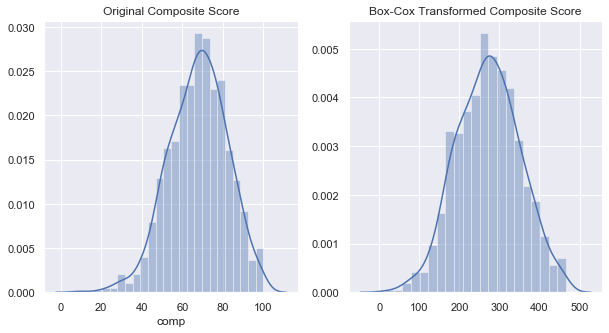

----------------------------------------------------
Normality Test for Original Composite Score
Jarque-Bera test statistics is 15.453387913085168 and p value is 0.00044089934264401887
Normality test statistics is 15.186721327231322 and p value is 0.0005037851534494478
----------------------------------------------------
Normality Test for Box-Cox Transformed Composite Score
Jarque-Bera test statistics is 2.4353989331279 and p value is 0.2959101356398447
Normality test statistics is 2.779857602227616 and p value is 0.24909303914726724


In [74]:
stu['comp'] = (stu['math score'] + stu['reading score'] + stu['writing score']) / 3

comp_boxcox,_ = boxcox(stu['comp'])

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.distplot(stu['comp'])
plt.title("Original Composite Score")

plt.subplot(1,2,2)
sns.distplot(comp_boxcox)
plt.title("Box-Cox Transformed Composite Score")

plt.show()

jb_stats1 = jarque_bera(stu['comp'])
norm_stats1 = normaltest(stu['comp'])

print("----------------------------------------------------")
print("Normality Test for Original Composite Score")
print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats1[0], jb_stats1[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats1[0], norm_stats1[1]))


jb_stats2 = jarque_bera(comp_boxcox)
norm_stats2 = normaltest(comp_boxcox)

print("----------------------------------------------------")
print("Normality Test for Box-Cox Transformed Composite Score")
print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats2[0], jb_stats2[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats2[0], norm_stats2[1]))

### 3. Which variables seem related to the target variable (the newly created variable in the previous question)? If our goal is to explain the determinants of success in exams, which variables in our dataset might be useful?

To answer this question, first, categorical variables need to be converted to numeric values. In examining the correlation matrix, gender, race/ethnicity, parental level of education, lunch, and test prep course are all related to the target variable composite score. Therefore, all these variable can be useful for explaining the determinants of success in exams. 

In [75]:
stu.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'comp'],
      dtype='object')

In [98]:
#Hobson: to examine correlations, should I do drop_first=True here? 
stu = pd.concat([stu, 
                 pd.get_dummies(stu['gender'], drop_first=True),
                 pd.get_dummies(stu['race/ethnicity'], drop_first=True),
                 pd.get_dummies(stu['parental level of education'], drop_first=True),
                 pd.get_dummies(stu['lunch'], drop_first=True),
                 pd.get_dummies(stu['test preparation course'], drop_first=True)], axis=1
               )
#stu.head()

In [99]:
#stu.corr().round(2)

In [92]:
corr = pd.DataFrame(stu.corr().round(2))
corr['comp']

math score           0.92
reading score        0.97
writing score        0.97
comp                 1.00
male                -0.13
group B             -0.08
group C             -0.03
group D              0.06
group E              0.14
bachelor's degree    0.11
high school         -0.16
master's degree      0.10
some college         0.03
some high school    -0.09
standard             0.29
none                -0.26
Name: comp, dtype: float64

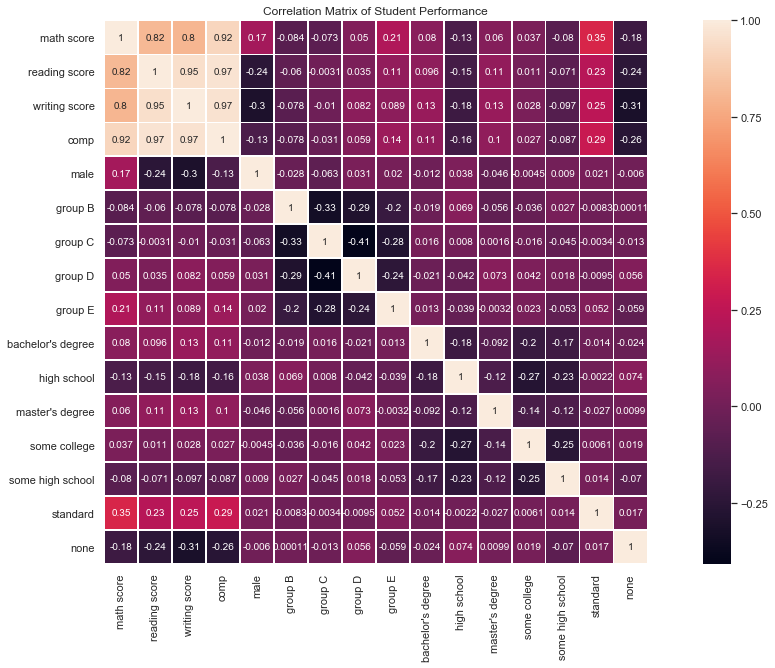

In [97]:
plt.figure(figsize=(20,10))
sns.heatmap(corr, square=True, annot=True, linewidths=.5)
plt.title("Correlation Matrix of Student Performance")

plt.show()